In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('asiacup.csv')
df.head()

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win


In [ ]:
df.describe()

,Year,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket
count,254.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2006.905512,201.920635,6.892857,15.626984,2.912698,13.238095,5.308214,76.676667,69.309524,6.892857,13.238095,2.563492
std,11.014495,67.331860,2.874609,7.754946,2.596411,7.621973,1.584823,30.678228,29.813488,2.874609,7.621973,1.100496
min,1984.000000,38.000000,0.000000,0.000000,0.000000,0.000000,2.200000,24.630000,8.000000,0.000000,0.000000,0.000000
25%,1997.750000,147.000000,5.000000,10.000000,1.000000,8.000000,4.227500,54.742500,47.000000,5.000000,8.000000,2.000000
50%,2008.000000,193.000000,7.000000,15.000000,2.000000,12.000000,5.090000,73.155000,66.500000,7.000000,12.000000,3.000000
75%,2016.000000,253.250000,10.000000,20.000000,4.250000,18.000000,6.100000,92.897500,85.000000,10.000000,18.000000,3.000000
max,2022.000000,385.000000,10.000000,41.000000,14.000000,38.000000,10.600000,194.050000,183.000000,10.000000,38.000000,6.000000


In [ ]:
df.dtypes

Team                          object
Opponent                      object
Format                        object
Ground                        object
Year                           int64
Toss                          object
Selection                     object
Run Scored                   float64
Wicket Lost                  float64
Fours                        float64
Sixes                        float64
Extras                       float64
Run Rate                     float64
Avg Bat Strike Rate          float64
Highest Score                float64
Wicket Taken                 float64
Given Extras                 float64
Highest Individual wicket    float64
Player Of The Match           object
Result                        object
dtype: object

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Team                         0
Opponent                     0
Format                       0
Ground                       0
Year                         0
Toss                         0
Selection                    0
Run Scored                   2
Wicket Lost                  2
Fours                        2
Sixes                        2
Extras                       2
Run Rate                     2
Avg Bat Strike Rate          2
Highest Score                2
Wicket Taken                 2
Given Extras                 2
Highest Individual wicket    2
Player Of The Match          2
Result                       0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# List of numerical columns with missing values
numerical_columns_with_missing = ['Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
                                  'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
                                  'Highest Individual wicket']

# Initialize SimpleImputer with the strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fill missing values in numerical columns
df[numerical_columns_with_missing] = imputer.fit_transform(df[numerical_columns_with_missing])

In [ ]:
df = df[~df['Result'].str.contains('D/L', case=False, na=False)]
df['Result']

0      Lose
1       Win
2       Win
3      Lose
4       Win
       ... 
249     Win
250    Lose
251     Win
252    Lose
253     Win
Name: Result, Length: 252, dtype: object

In [ ]:
df

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,India,Afghanistan,T20I,Dubai(DSC),2022,Lose,Batting,212.0,2.0,21.0,9.0,2.0,10.60,194.05,122.0,8.0,3.0,5.0,Virat Kohli,Win
250,Pakistan,Sri Lanka,T20I,Dubai(DSC),2022,Lose,Batting,121.0,10.0,4.0,3.0,17.0,6.31,58.78,30.0,5.0,5.0,2.0,Wanindu Hasaranga de Silva,Lose
251,Sri Lanka,Pakistan,T20I,Dubai(DSC),2022,Win,Bowling,124.0,5.0,9.0,5.0,5.0,7.29,111.50,55.0,10.0,17.0,3.0,Wanindu Hasaranga de Silva,Win
252,Pakistan,Sri Lanka,T20I,Dubai(DSC),2022,Win,Bowling,147.0,10.0,9.0,4.0,14.0,7.35,99.38,55.0,6.0,10.0,3.0,Bhanuka Rajapaksa,Lose


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Result" column directly
df['Result'] = label_encoder.fit_transform(df['Result'])

# Display the encoded DataFrame
print(df.head())

        Team   Opponent Format   Ground  Year  Toss Selection  Run Scored  \
0   Pakistan  Sri Lanka    ODI  Sharjah  1984  Lose   Batting       187.0   
1  Sri Lanka   Pakistan    ODI  Sharjah  1984   Win   Bowling       190.0   
2      India  Sri Lanka    ODI  Sharjah  1984   Win   Bowling        97.0   
3  Sri Lanka      India    ODI  Sharjah  1984  Lose   Batting        96.0   
4      India   Pakistan    ODI  Sharjah  1984   Win   Batting       188.0   

   Wicket Lost  Fours  Sixes  Extras  Run Rate  Avg Bat Strike Rate  \
0          9.0    9.0    3.0    21.0      4.06                52.04   
1          5.0   11.0    1.0    26.0      4.36                68.51   
2          0.0    9.0    0.0    14.0      4.47                60.48   
3         10.0    7.0    0.0     8.0      2.34                25.74   
4          4.0   13.0    3.0    17.0      4.08                60.21   

   Highest Score  Wicket Taken  Given Extras  Highest Individual wicket  \
0           47.0           5.0     

In [ ]:
df.dtypes

Team                          object
Opponent                      object
Format                        object
Ground                        object
Year                           int64
Toss                          object
Selection                     object
Run Scored                   float64
Wicket Lost                  float64
Fours                        float64
Sixes                        float64
Extras                       float64
Run Rate                     float64
Avg Bat Strike Rate          float64
Highest Score                float64
Wicket Taken                 float64
Given Extras                 float64
Highest Individual wicket    float64
Player Of The Match           object
Result                         int64
dtype: object

In [ ]:
import pandas as pd

# Assume df is your DataFrame with the provided columns and data types

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
print(df_encoded.head())


   Year  Run Scored  Wicket Lost  Fours  Sixes  Extras  Run Rate  \
0  1984       187.0          9.0    9.0    3.0    21.0      4.06   
1  1984       190.0          5.0   11.0    1.0    26.0      4.36   
2  1984        97.0          0.0    9.0    0.0    14.0      4.47   
3  1984        96.0         10.0    7.0    0.0     8.0      2.34   
4  1984       188.0          4.0   13.0    3.0    17.0      4.08   

   Avg Bat Strike Rate  Highest Score  Wicket Taken  ...  \
0                52.04           47.0           5.0  ...   
1                68.51           57.0           9.0  ...   
2                60.48           51.0          10.0  ...   
3                25.74           38.0           0.0  ...   
4                60.21           56.0          10.0  ...   

   Player Of The Match_Suryakumar Yadav  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4              

In [ ]:
df_encoded.head()

,Year,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,...,Player Of The Match_Suryakumar Yadav,Player Of The Match_Tillakaratne Dilshan,Player Of The Match_Umar Akmal,Player Of The Match_Usman Shinwari,Player Of The Match_Virat Kohli,Player Of The Match_Virender Sehwag,Player Of The Match_Wanindu Hasaranga de Silva,Player Of The Match_Wasim Akram,Player Of The Match_Yasir Hameed,Player Of The Match_Younis Khan
0,1984,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,...,False,False,False,False,False,False,False,False,False,False
1,1984,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1984,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,...,False,False,False,False,False,False,False,False,False,False
3,1984,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1984,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,...,False,False,False,False,False,False,False,False,False,False


**Visualization**

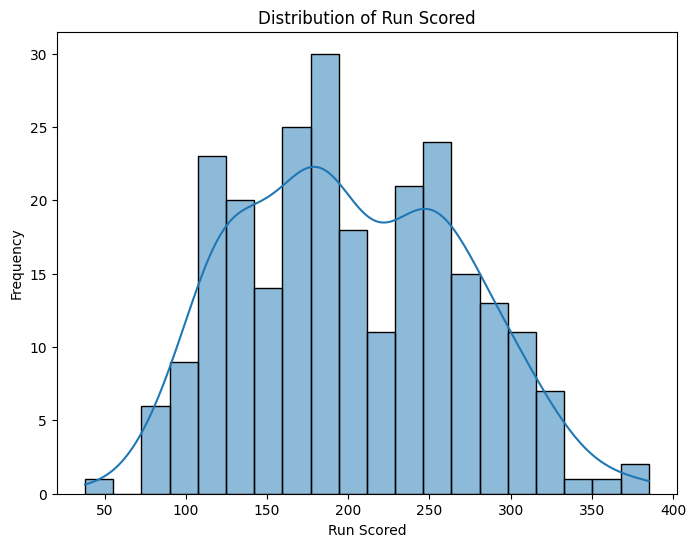

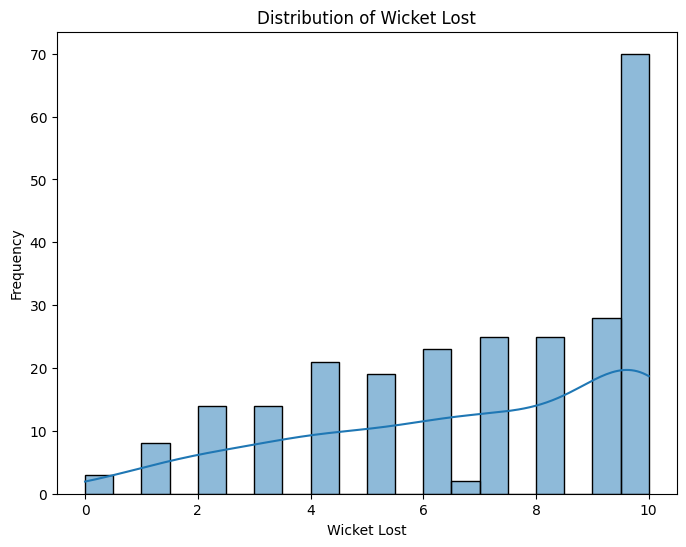

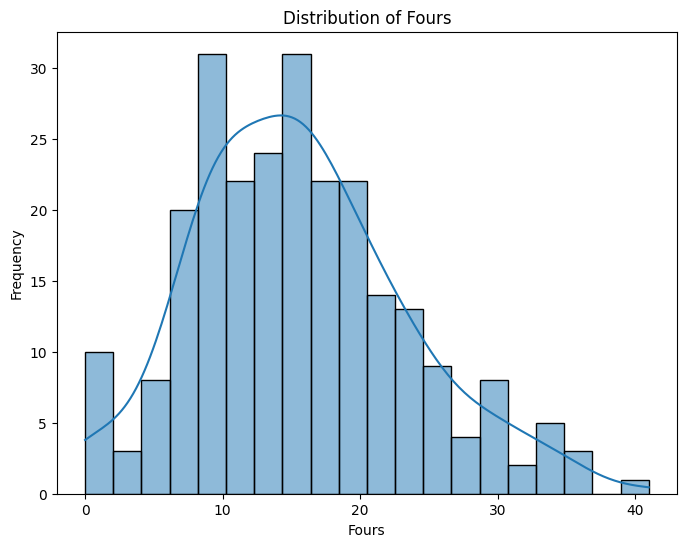

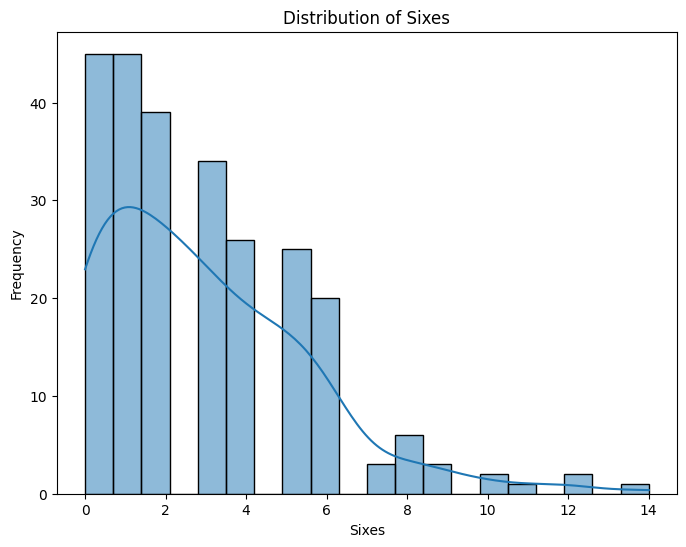

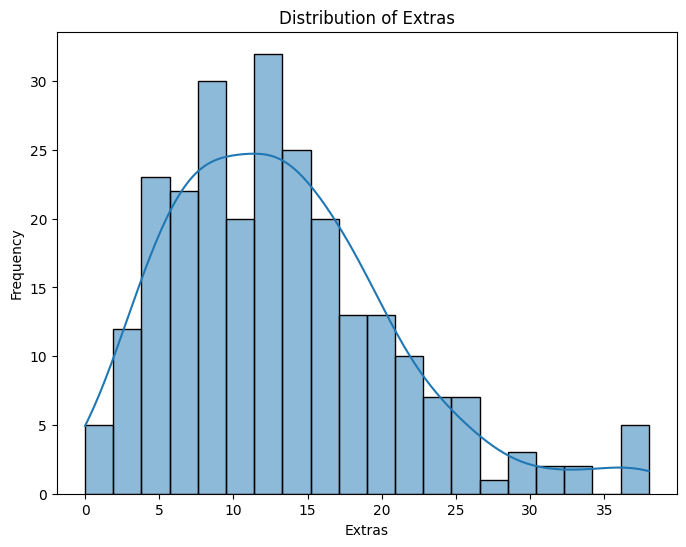

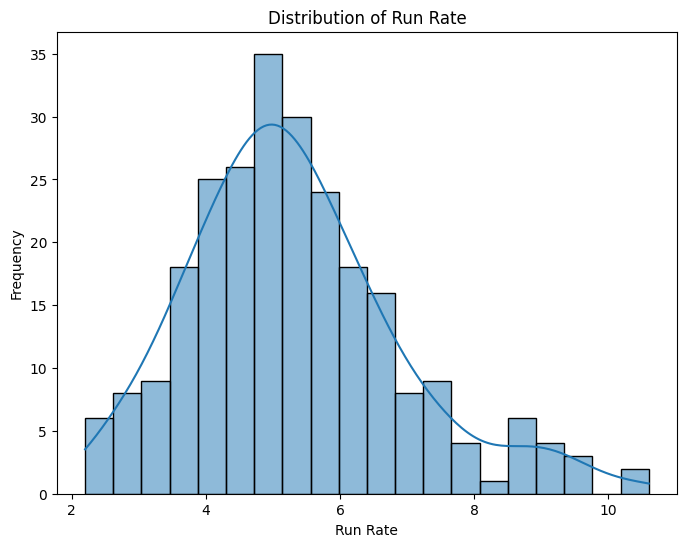

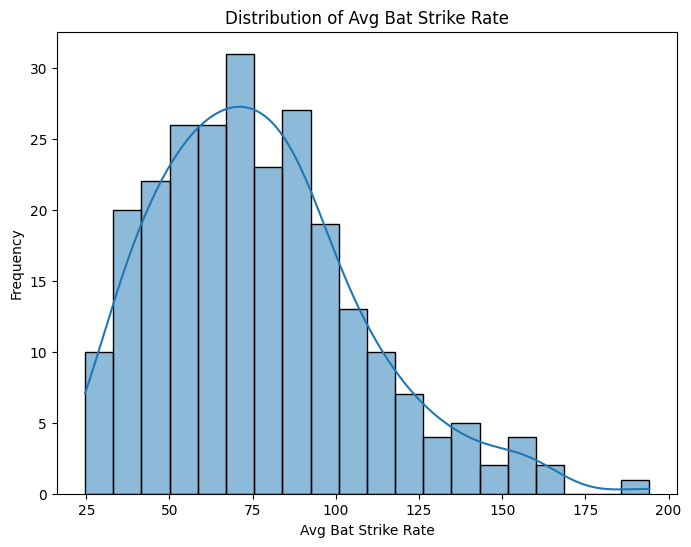

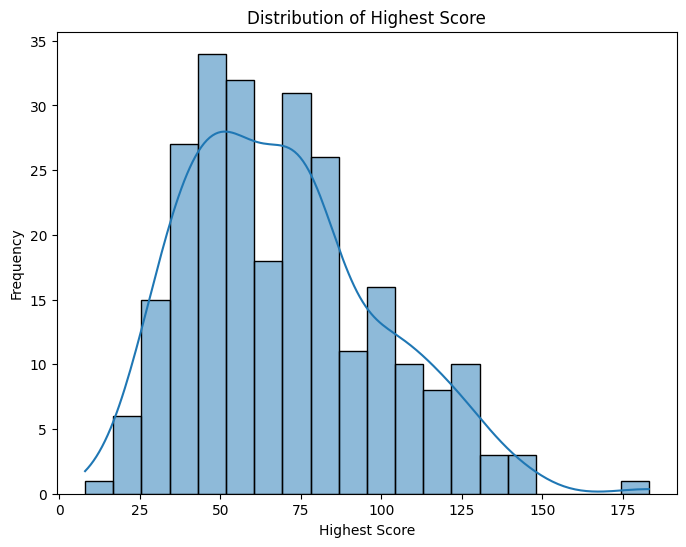

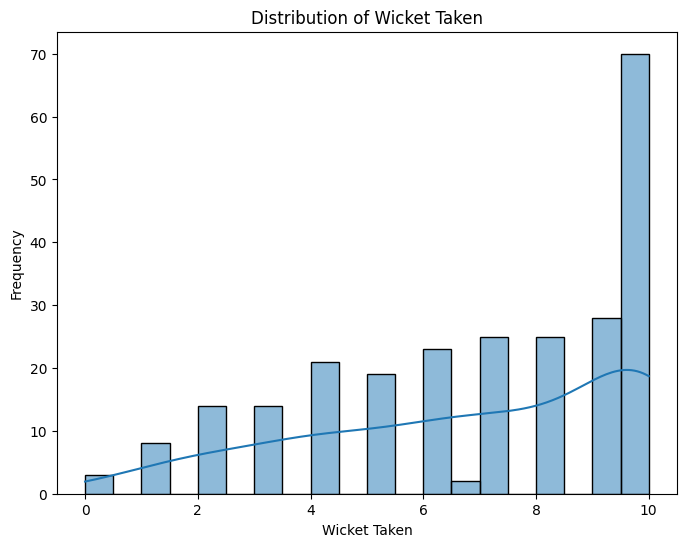

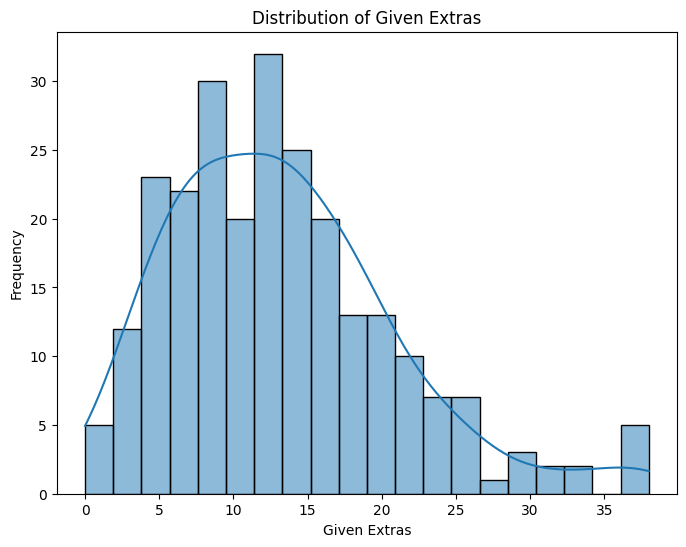

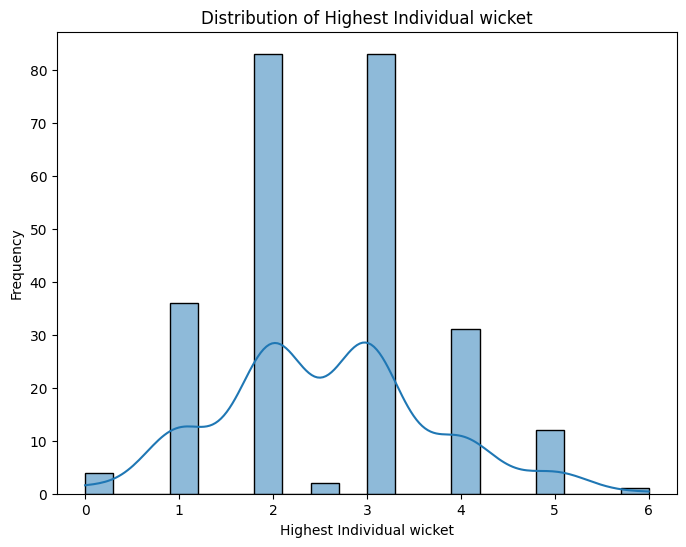

In [ ]:
import seaborn as sns
numerical_variables = ['Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
                       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
                       'Highest Individual wicket']
categorical_variables = ['Team', 'Opponent', 'Format', 'Ground', 'Year', 'Toss', 'Selection',
                         'Player Of The Match', 'Result']

# Plot histograms, box plots, and scatter plots for numerical variables
for col in numerical_variables:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Box plot**

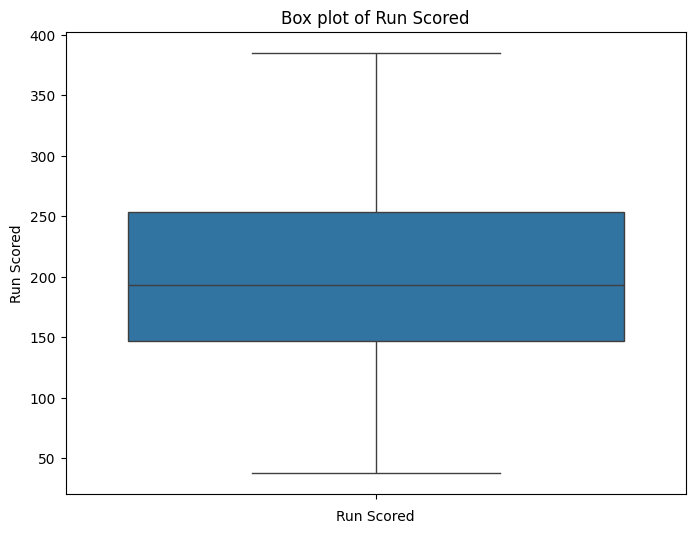

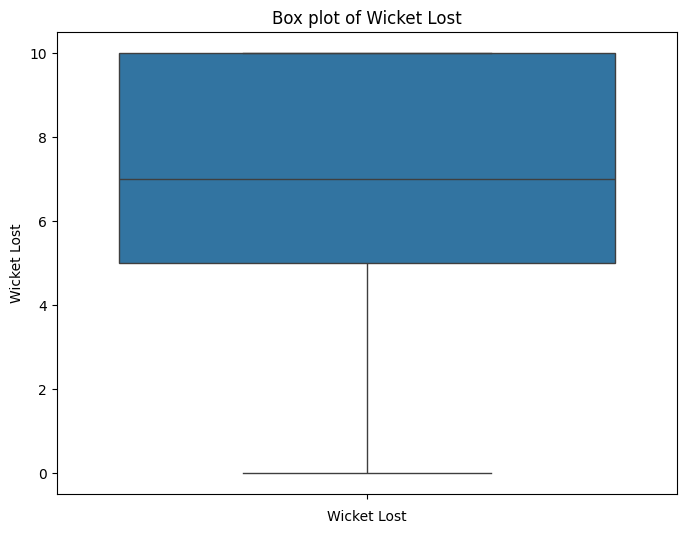

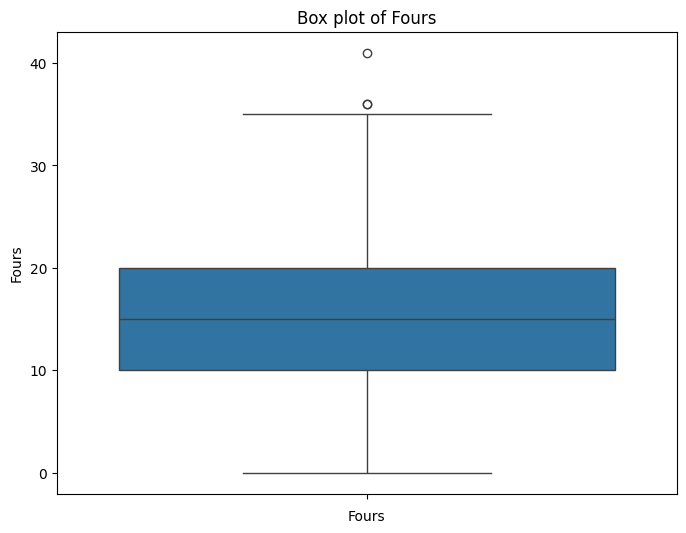

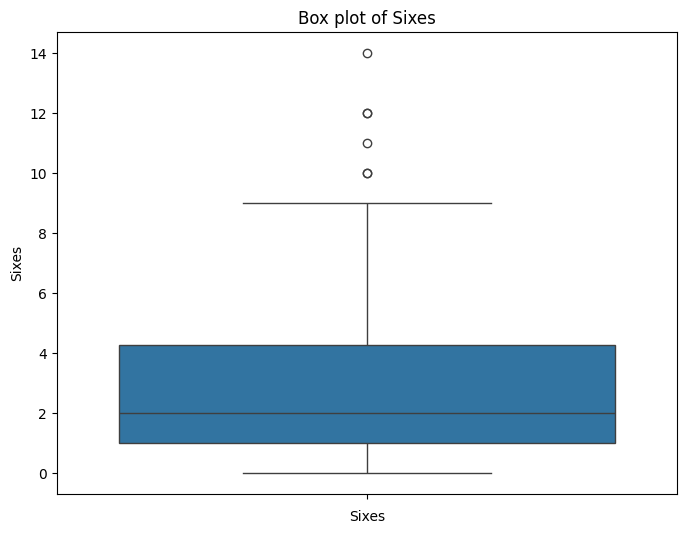

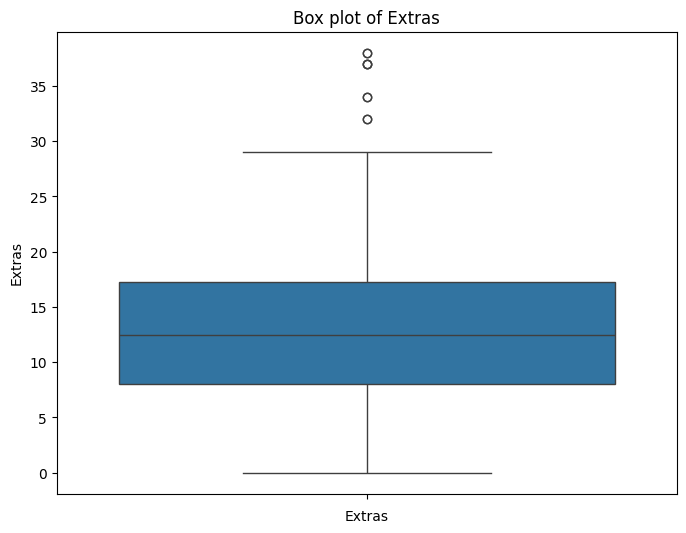

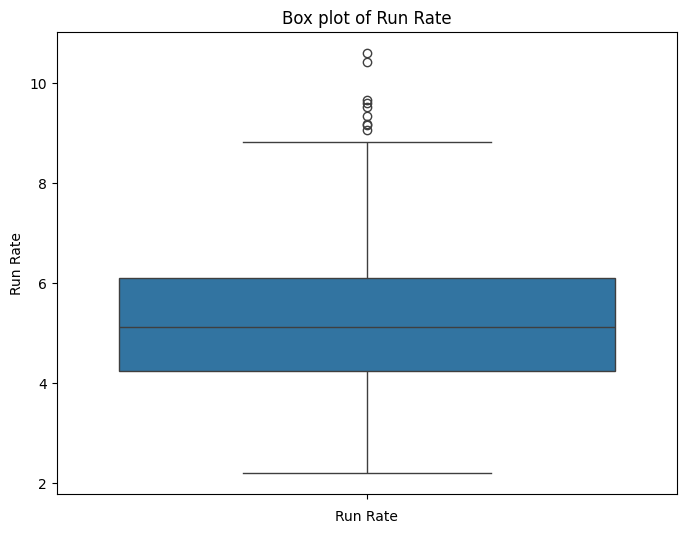

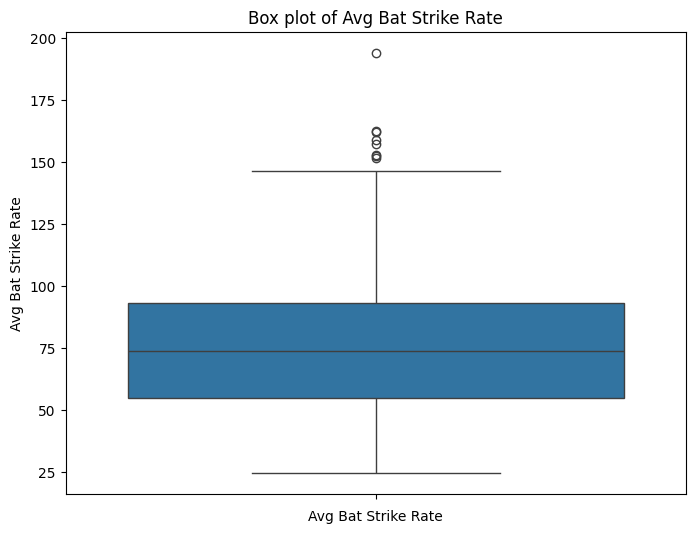

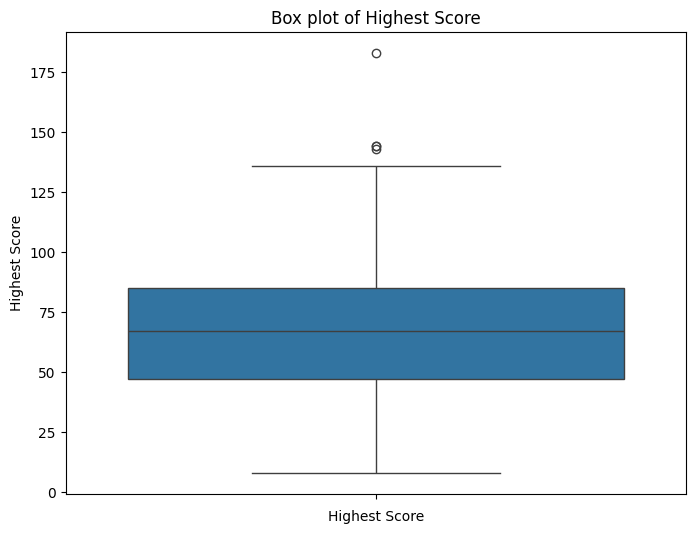

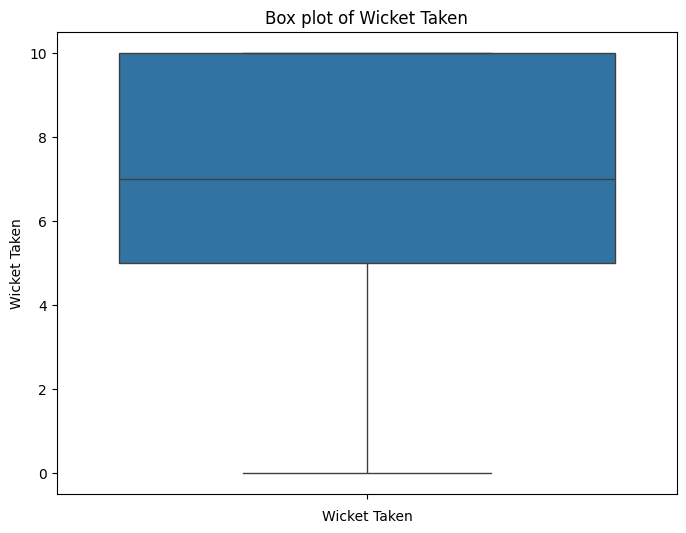

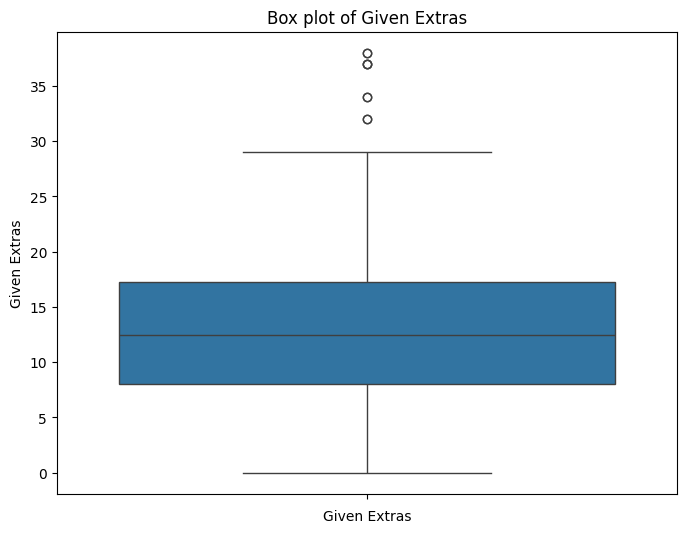

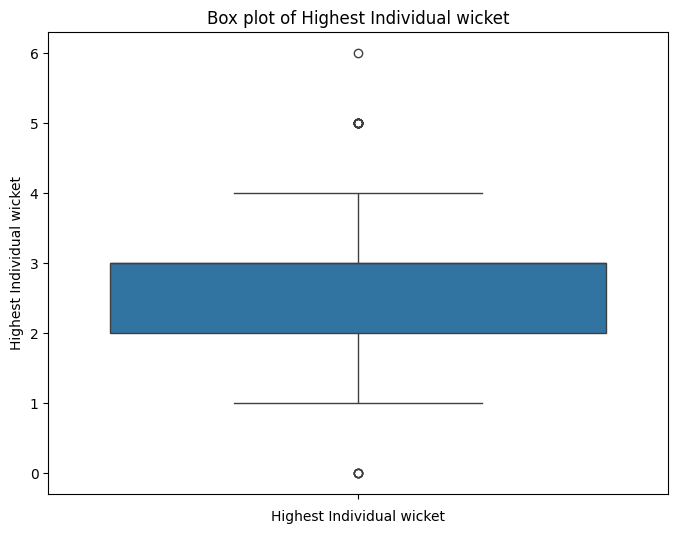

In [ ]:
for col in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

**Scatter plot**

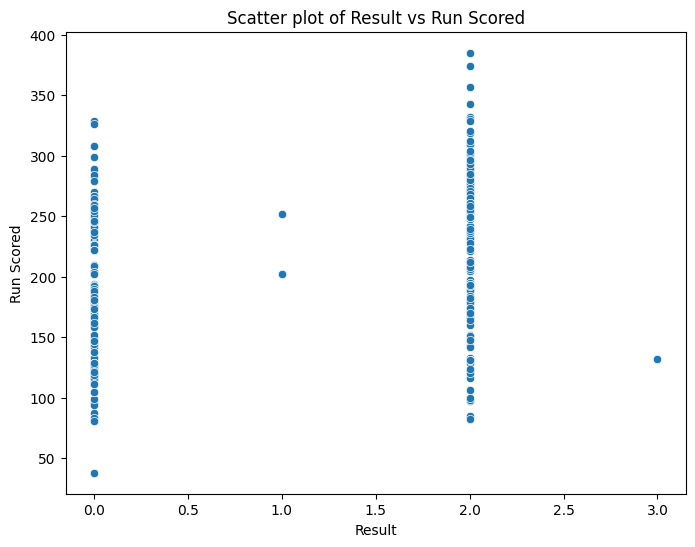

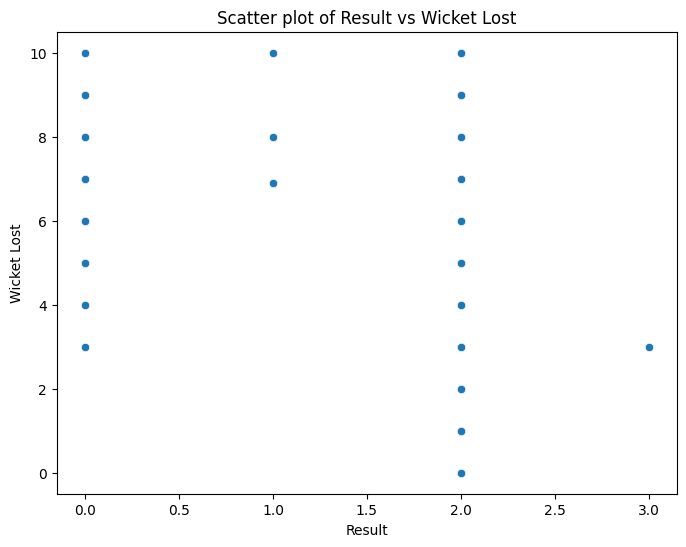

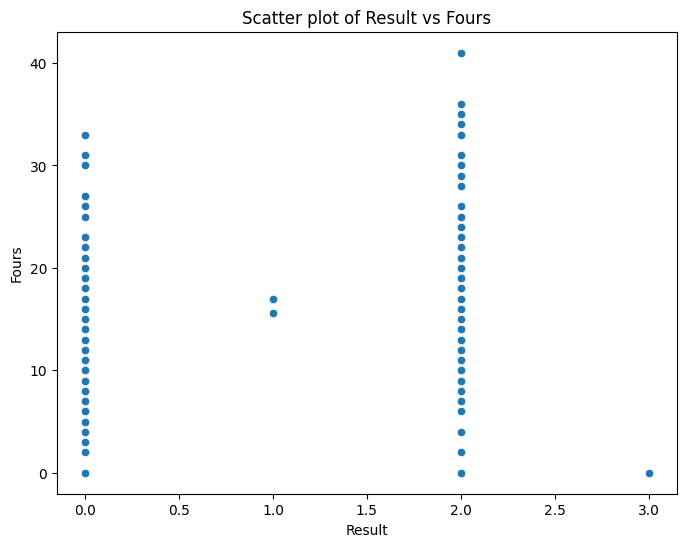

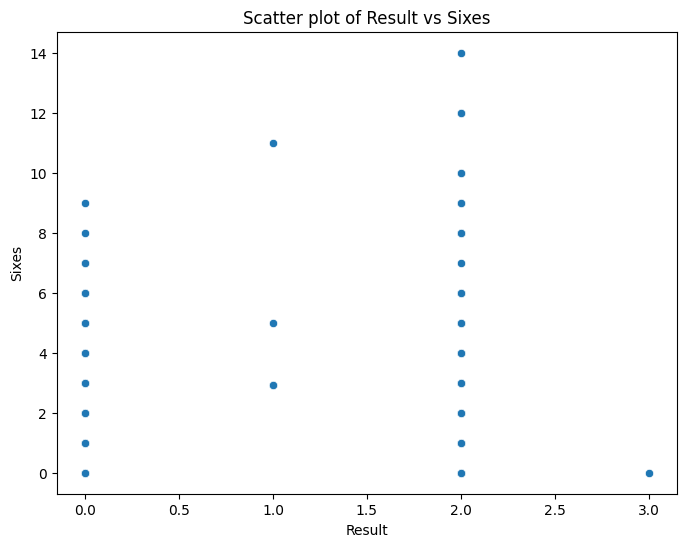

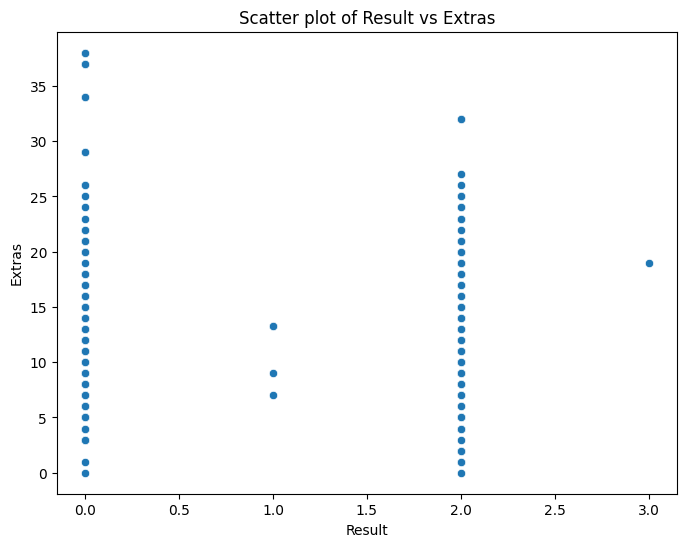

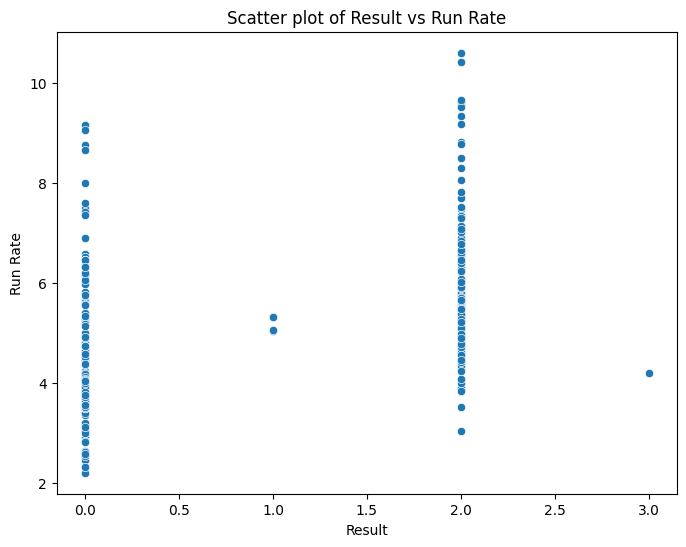

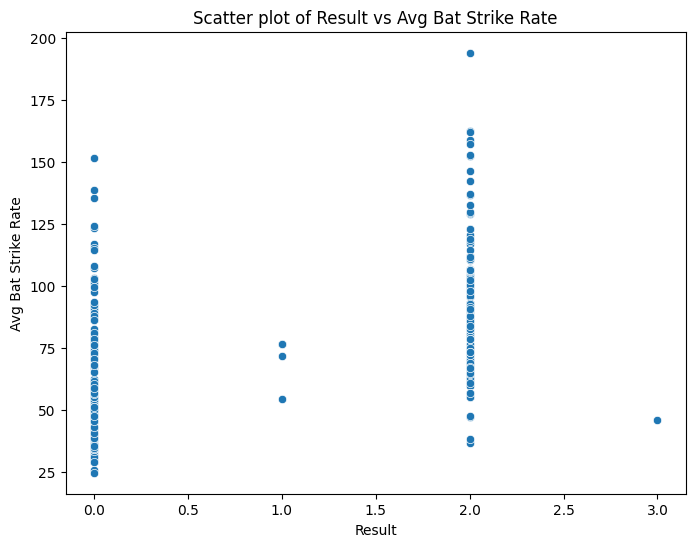

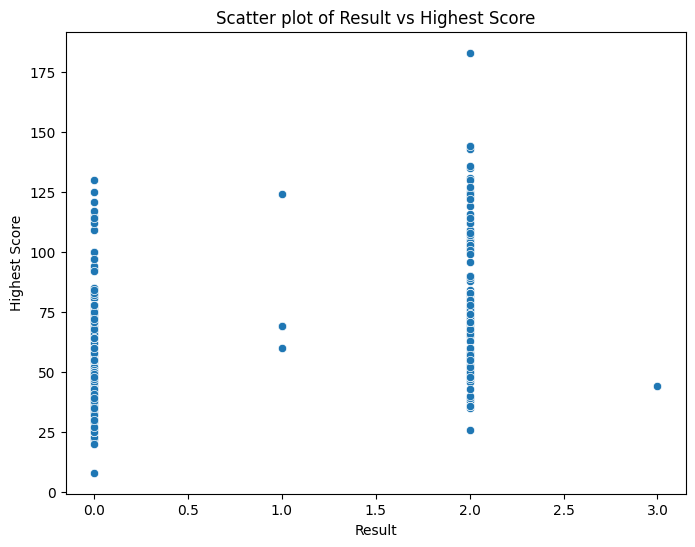

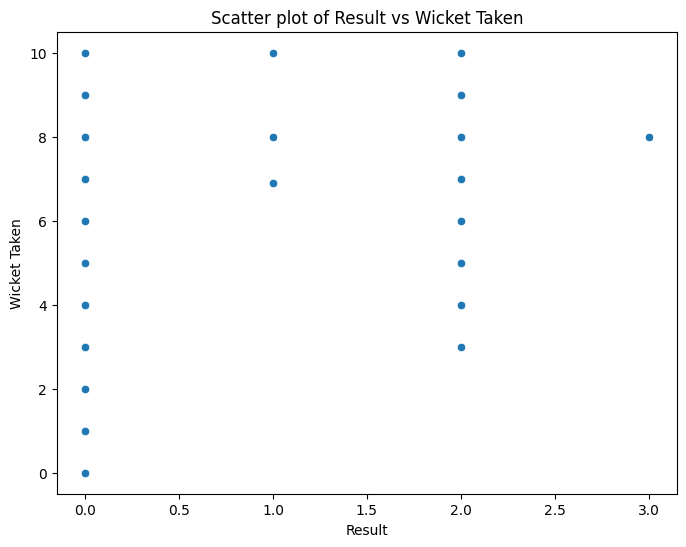

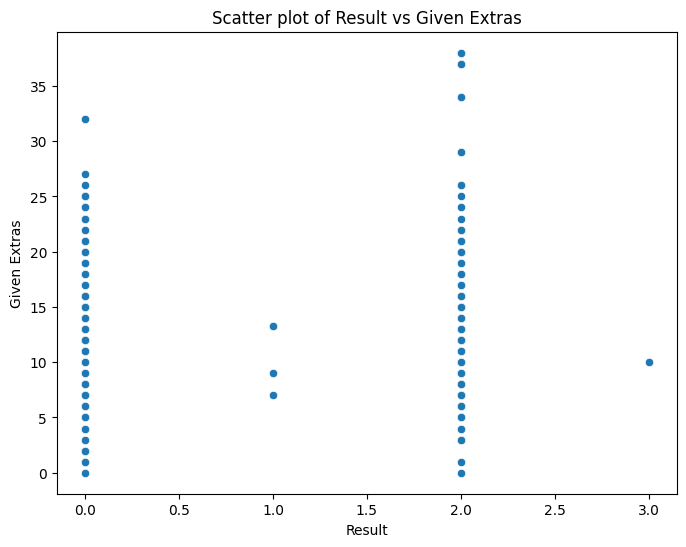

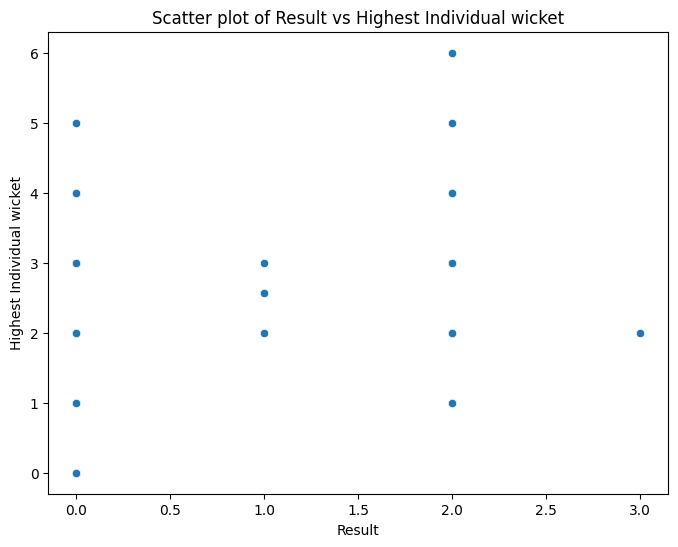

In [ ]:
    for other_col in numerical_variables:
        if other_col != col:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=col, y=other_col, data=df)
            plt.title(f'Scatter plot of {col} vs {other_col}')
            plt.xlabel(col)
            plt.ylabel(other_col)
            plt.show()

**Frequencies**

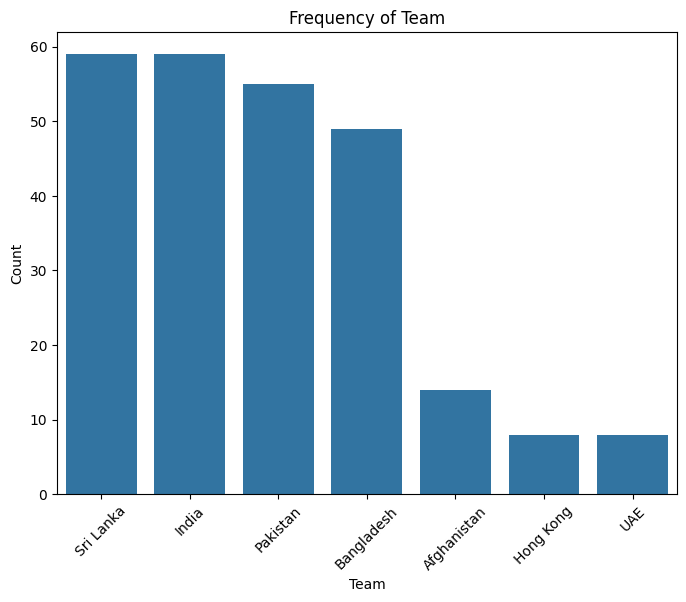

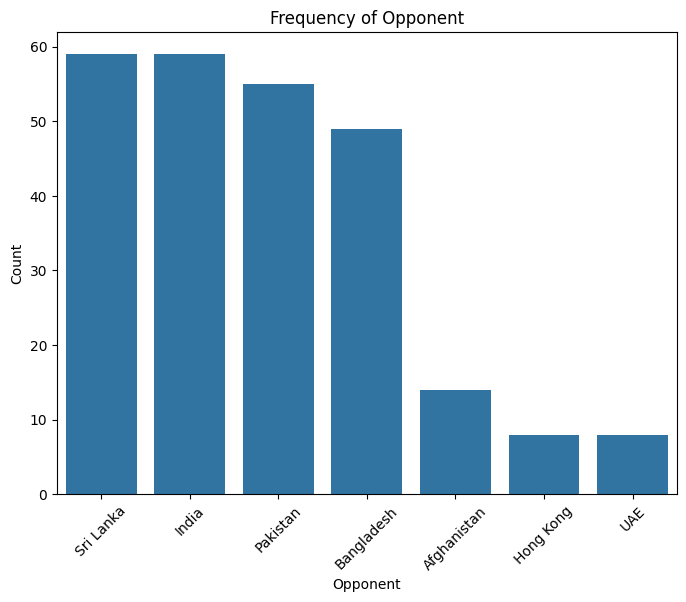

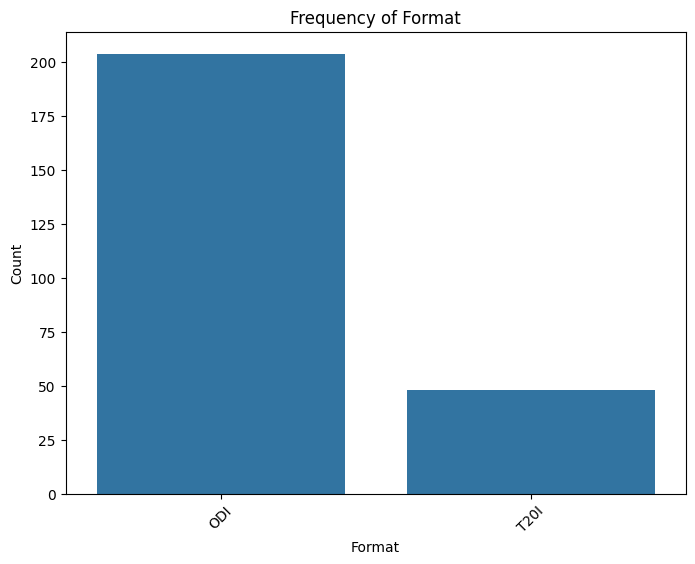

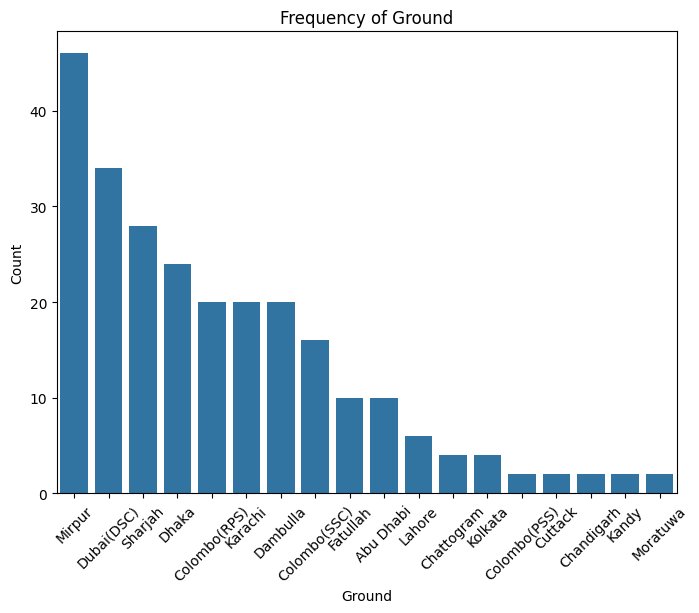

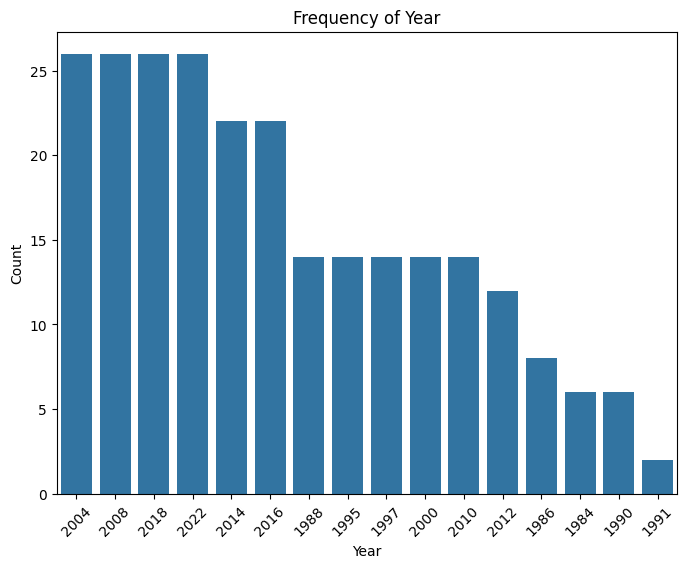

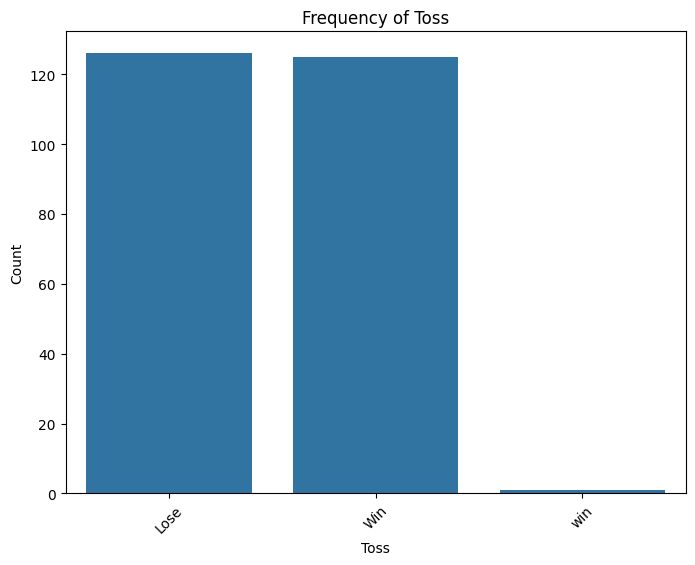

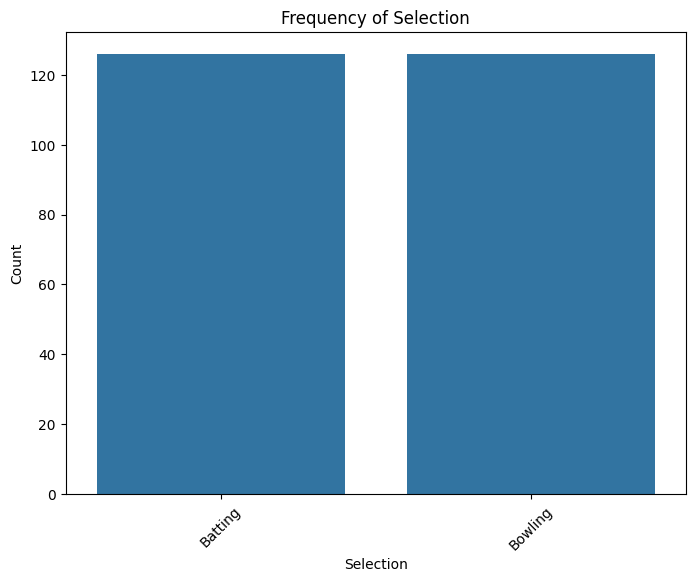

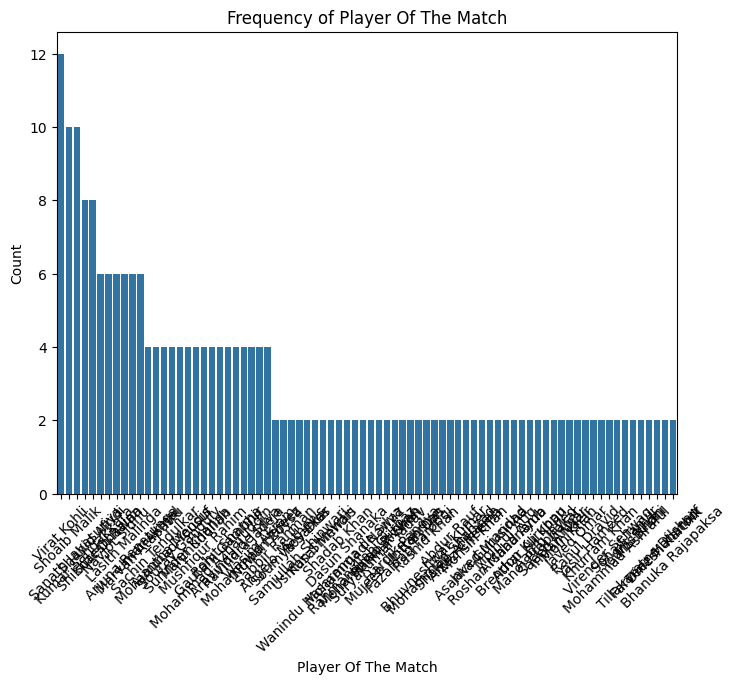

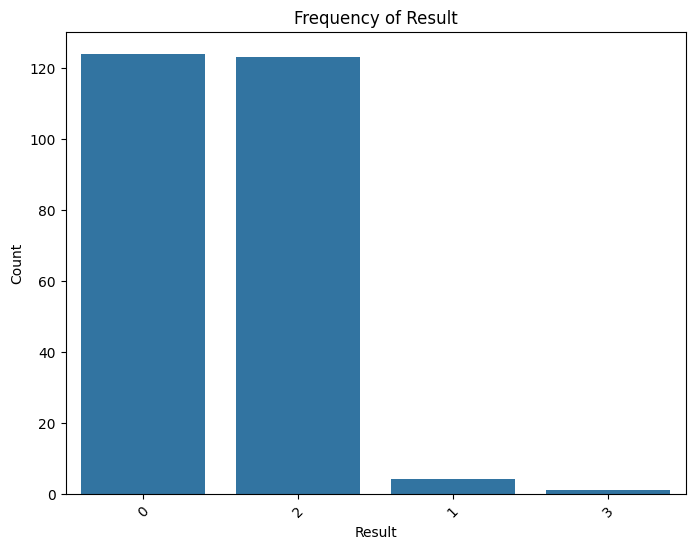

In [ ]:
for col in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

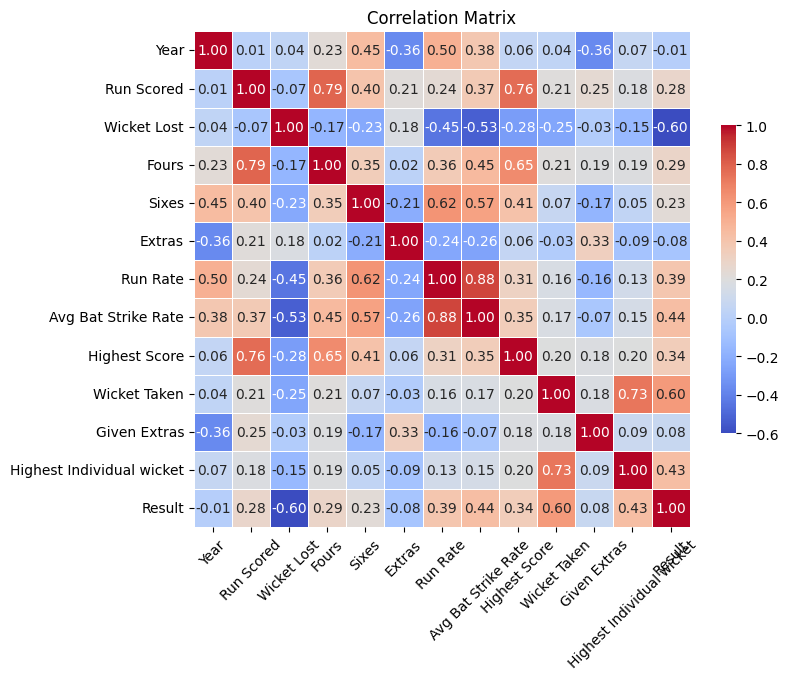

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = df_numeric.corr()
# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


**Wrapper based method to select best features**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y) from the encoded DataFrame
X = df_encoded.drop(columns=['Result'])  # Features
y = df_encoded['Result']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the model for feature selection (e.g., RandomForestClassifier)
model = RandomForestClassifier()

# 4. Apply RFE
num_features_to_select = 10  # Choose the number of features you want to select
rfe = RFE(model, n_features_to_select=num_features_to_select)

# 5. Fit RFE to the training data
rfe.fit(X_train, y_train)

# 6. Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Year', 'Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken',
       'Highest Individual wicket'],
      dtype='object')


**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier()

# Train the decision tree model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7254901960784313


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming X contains all features, 'selected_features' contains the selected feature names,
# and 'y' is the target variable
selected_features = ['Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken',
       'Highest Individual wicket']
X_selected = X[selected_features]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8823529411764706

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           2       0.88      0.88      0.88        25
           3       0.00      0.00      0.00         1

    accuracy                           0.88        51
   macro avg       0.59      0.60      0.59        51
weighted avg       0.87      0.88      0.87        51



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

**SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8627450980392157

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           2       0.88      0.84      0.86        25
           3       0.00      0.00      0.00         1

    accuracy                           0.86        51
   macro avg       0.58      0.59      0.58        51
weighted avg       0.85      0.86      0.85        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naieve Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8627450980392157

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.00      0.00      0.00         0
           2       0.92      0.88      0.90        25
           3       0.00      0.00      0.00         1

    accuracy                           0.86        51
   macro avg       0.45      0.44      0.44        51
weighted avg       0.88      0.86      0.87        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.7 MB/s eta 0:00:00


**Shap for logistic regression**

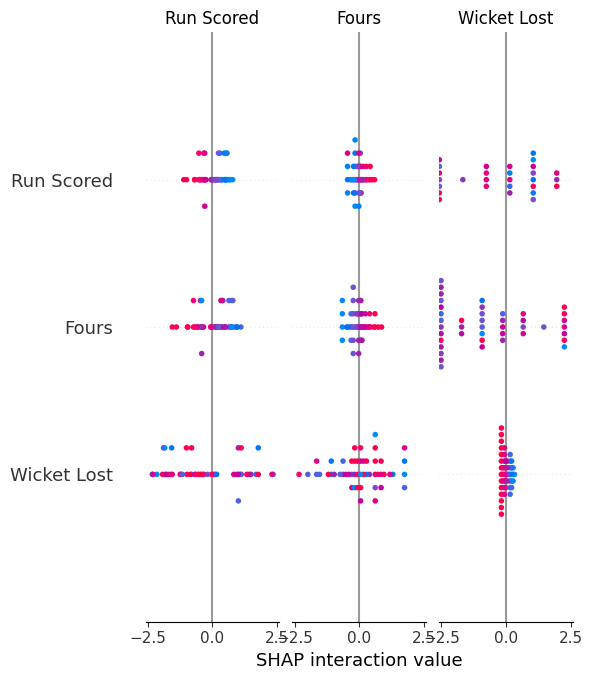

In [ ]:
import shap

# Initialize the SHAP explainer with the logistic regression model
explainer = shap.Explainer(logistic_regression_model, X_train)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

**Ann**

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define a custom learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/50
4/4 [==============================] - 4s 320ms/step - loss: 0.7384 - accuracy: 0.2353 - val_loss: 1.6826 - val_accuracy: 0.0769 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 0s 93ms/step - loss: 0.6287 - accuracy: 0.2059 - val_loss: 0.8855 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/50
4/4 [==============================] - 0s 92ms/step - loss: 0.7791 - accuracy: 0.2647 - val_loss: 0.4637 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/50
4/4 [==============================] - 0s 84ms/step - loss: 0.8449 - accuracy: 0.2353 - val_loss: 0.2392 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/50
4/4 [==============================] - 0s 41ms/step - loss: 0.3726 - accuracy: 0.2843 - val_loss: 0.0628 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/50
4/4 [==============================] - 0s 51ms/step - loss: 0.4646 - accuracy: 0.2647 - val_loss: -0.0992 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/50
4/4 [==============================] - 0s 57ms/step - l

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.504972286087545
R^2 Score: 0.47396579760565005


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()

# 4. Fit the model to the training data
gbm_model.fit(X_train, y_train)

# 5. Make predictions on the testing data
y_pred = gbm_model.predict(X_test)

# 6. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.71875


**Ridge regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.5043763816102396
R^2 Score: 0.47458655669492844


**Hyperparameters tuning**

**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define a refined parameter grid with higher values for alpha
param_grid = {'alpha': [10.0, 100.0, 1000.0, 10000.0]}

# Initialize Ridge regression model
ridge_model = Ridge()

# Perform GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", best_ridge_model)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Best Model Parameters: Ridge(alpha=100.0)
Mean Squared Error: 0.46911139764225446
R^2 Score: 0.5113224097806017


**Linear Regression**

In [ ]:
from sklearn.linear_model import Lasso

# Define the alpha values to try
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]  # Adjust as needed

# Initialize and train the Lasso regression model using GridSearchCV
lasso_model = GridSearchCV(Lasso(), {'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
lasso_model.fit(X_train, y_train)

# Get the best model
best_lasso_model = lasso_model.best_estimator_

# Make predictions on the test set
y_pred = best_lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", lasso_model.best_params_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Best Model Parameters: {'alpha': 0.1}
Mean Squared Error: 0.4885448445413526
R^2 Score: 0.491078412197004


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(gbm_model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_gbm = grid_search.best_estimator_
y_pred = best_gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best cross-validation accuracy: 0.81
Test set accuracy: 0.875


**Naieve Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)  # Exploring 100 values between 1 and 1e-9
}

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'var_smoothing': 4.328761281083053e-06}
Best cross-validation accuracy: 0.87
Test set accuracy: 0.8627450980392157

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.00      0.00      0.00         0
           2       0.92      0.88      0.90        25
           3       0.00      0.00      0.00         1

    accuracy                           0.86        51
   macro avg       0.45      0.44      0.44        51
weighted avg       0.88      0.86      0.87        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.